### **Comparación entre el ICG, el ICC y los resultados de rentabilidad del sector financiero**


El presente notebook hace una comparación entre en Índice de confianza en el gobierno y el índice de confianza del consumidor, ambos medidos por la Universidad Di Tella, a su vez se hace una comparación gráfica entre el ICG y la rentabilidad obtenida por el sector financiero.



**Índice de Confianza en el Gobierno**

El ICG tiene como objetivo medir la evolución de la opinión pública respecto de la labor que desarrolla el gobierno nacional. Está diseñado de forma de captar lo que los ciudadanos piensan respecto de aspectos esenciales del gobierno nacional, a partir de la estimación de cinco dimensiones: (1) la imagen o evaluación general del gobierno, (2) la percepción sobre si se gobierna pensando en el bien general o en el de sectores particulares, (3) la eficiencia en la administración del gasto público, (4) la honestidad de los miembros del gobierno, y (5) la capacidad del gobierno para resolver los problemas del país. El índice se presenta en una escala que varía entre un mínimo de 0 y un máximo de 5.

**Índice de Confianza del Consumidor**

El ICC es el estudio periódico de las percepciones de los individuos sobre el estado de la economía, la situación económica personal y las expectativas a mediano plazo.    

Fuente: Universidad Di Tella

In [23]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
icg = pd.read_excel('ICG.xlsx')
rent_fin = pd.read_csv('https://infra.datos.gob.ar/catalog/sspm/dataset/333/distribution/333.1/download/datos-rentabilidad-sistema-financiero.csv')
icc = pd.read_csv('http://infra.datos.gob.ar/catalog/sspm/dataset/380/distribution/380.3/download/indice-confianza-consumidor-valores-mensuales.csv')

In [51]:
rent_fin.tail()

,indice_tiempo,sist_financ_margen_financ,sist_financ_margen_financ_ingresos_por_intereses,sist_financ_margen_financ_egresos_por_intereses,sist_financ_margen_financ_ajustes_cer_cvs,sist_financ_margen_financ_diferencias_cotizacion,sist_financ_margen_financ_resultado_titulos_valores,sist_financ_margen_financ_primas_por_pases,sist_financ_margen_financ_otros_resultados_financs,sist_financ_resultado_por_servicios,...,enti_finan_no_banc_gastos_administracion,enti_finan_no_banc_cargas_impositivas,enti_finan_no_banc_ajustes_valuacion_prestamos_sector_pub,enti_finan_no_banc_amortizacion_amparos,enti_finan_no_banc_diversos,enti_finan_no_banc_resultado_monetario,enti_finan_no_banc_resultado_tot_antes_imp_ganancias,enti_finan_no_banc_impuesto_ganancias,enti_finan_no_banc_resultado_total,enti_finan_no_banc_resultado_ajustado
11,2013-01-01,88508.683,96850.509,-47949.820,2152.802,11286.906,22279.804,1434.815,2453.667,36502.834,...,-1649.885,-452.739,-6.000000e-03,-0.006,146.724,0.0,1147.793,-444.719,703.074,703.086
12,2014-01-01,130404.889,144299.146,-80466.996,4401.774,13812.220,44198.021,1374.244,2786.480,47972.494,...,-1836.403,-580.899,0.000000e+00,0.000,264.529,0.0,1569.258,-545.567,1023.691,1023.691
13,2015-01-01,173870.248,185264.257,-107617.361,2876.637,11342.265,82738.890,2161.339,-2895.779,61852.292,...,-2259.901,-652.015,0.000000e+00,-0.073,290.448,0.0,1998.922,-731.230,1267.692,1267.765
14,2016-01-01,232918.160,254592.542,-161354.011,6922.143,18948.871,112125.319,3885.532,-2202.236,78610.337,...,-3010.150,-931.993,2.273737e-13,0.000,504.447,0.0,2321.490,-851.135,1470.355,1470.355
15,2017-01-01,285576.105,298111.433,-160624.660,8188.974,23056.546,107656.405,15445.332,-6257.925,80289.558,...,-4166.163,-1376.774,2.364688e-14,0.000,353.093,0.0,1618.429,NaN,NaN,NaN


In [42]:
icg["indice_tiempo"] = icg["indice_tiempo"].astype("datetime64")
icg.set_index("indice_tiempo", inplace = True)
icc["indice_tiempo"] = icc["indice_tiempo"].astype("datetime64")
icc.set_index("indice_tiempo", inplace = True)

In [43]:
# Recorte temporal.

icc = icc[(icc.index > '2003-02-01') & (icc.index <= '2019-12-31')] 

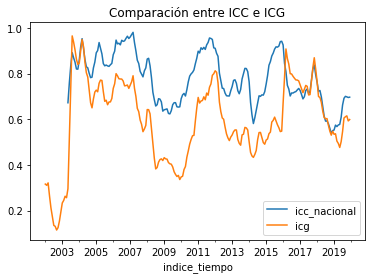

In [44]:
ax = plt.gca()

(icc.icc_nacional / icc.icc_nacional.max()).rolling(3).mean().plot(ax=ax,title= "Comparación entre ICC e ICG", legend = True)

(icg.icg / icg.icg.max()).rolling(3).mean().plot(ax=ax, legend = True)

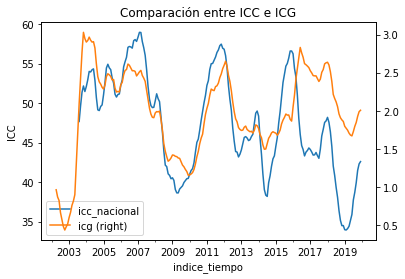

In [45]:
ax = plt.gca()
plt.xlabel('Serie temporal')
plt.ylabel('ICC')

icc.icc_nacional.rolling(6).mean().plot(ax=ax,title= "Comparación entre ICC e ICG", legend = True)

icg.icg.rolling(6).mean().plot(ax=ax, legend = True, secondary_y=True)

In [46]:
rent_fin["indice_tiempo"] = rent_fin["indice_tiempo"].astype("datetime64")

rent_fin.set_index("indice_tiempo", inplace = True)

rent_fin= rent_fin[(rent_fin.index > '2010-01-01') & (rent_fin.index <= '2019-12-31')] # Recorte temporal.

icg2 = icg[(icg.index > '2010-01-01') & (icg.index <= '2018-12-31')] # Recorte temporal.

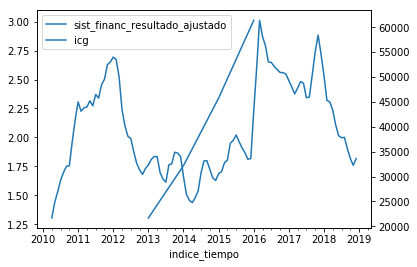

In [47]:
ax2 = plt.gca()

rent_fin.sist_financ_resultado_ajustado.rolling(3).mean().plot(ax=ax2, secondary_y=True, legend = True)
icg2.icg.rolling(3).mean().plot(ax=ax2, legend = True)

In [48]:
plt.plot(rent_fin.sist_financ_resultado_ajustado.rolling(12).mean())


plt.title('Rentabilidad sistema financiero')
plt.xlabel('Año')
plt.ylabel('Rentabilidad')

plt.show()

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units